<div id="container" style="position:relative;">
<div style="float:left"><h1> Exploratory Data Analysis </h1></div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# Reading the database from three tables

In [68]:
df_confirm=pd.read_csv('Corona_cases\Confirmed.csv')# this is for confirmed cases
df_death=pd.read_csv('Corona_cases\deaths.csv') # the number of death
df_recoverd=pd.read_csv('recoverd_2019.csv')# the number of recovered

### Trying to create line_datas to make a graph of the spread of affected people over time globaly:

In [69]:
line_datas=[]
for i in [df_confirm,df_death,df_recoverd]:
    i.drop(labels=['Province/State','Lat','Long','total'],axis=1,inplace=True)
    df=i.groupby('Country/Region').sum().reset_index()
    df_melt=pd.melt(df,id_vars=['Country/Region'])
    df_melt['variable']=pd.to_datetime(df_melt['variable'])
    df_melt.sort_values(by='variable')
    line_datas.append(pd.DataFrame(df_melt.groupby('variable')['value'].sum().reset_index()))
   

In [70]:
line_data1 = go.Scatter(x=line_datas[0]['variable'],y = line_datas[0]['value'], name="confirmed:/",mode='lines')
line_data2 = go.Scatter(x=line_datas[1]['variable'],y = line_datas[1]['value'], name="deaths:(",mode='lines')
line_data3 = go.Scatter(x=line_datas[2]['variable'],y = line_datas[2]['value'], name="Recovered:)",mode='lines')


fig = go.Figure(data=[line_data1,line_data2,line_data3],
    layout=go.Layout(width=900,height=500,xaxis_title='Date', yaxis_title='Number of instances'))
fig.update_layout(xaxis=dict(tickvals=line_datas[0]['variable'],tickangle=-45),
                 title={'text':'Confirmed cases, Recovered cases, and Death Over Time',
                        'x':0.5,
                        'y':0.85,
                        'xanchor':'center',
                       })
fig.show()

In [71]:
df=df_confirm1.groupby('Country/Region').sum().reset_index()

In [72]:
df.drop(labels=['Lat','Long'],axis=1,inplace=True) #.iloc[:,:].sum(axis=1)

In [73]:
df_sort=df.sort_values(by='total',ascending=False).head(20)
df_sort.reset_index(inplace=True)


In [74]:
df_sort.head()

,index,Country/Region,total
0,14,Mainland China,74999
1,17,Others,634
2,12,Japan,136
3,21,South Korea,104
4,20,Singapore,84


In [138]:
#df_sort.to_csv(r'countries_corona.csv') # to export the data for plotting in Tableau

# Trying to visualize the spread of coronavirus over the globe

In [75]:

df_sort= df_sort[df_sort['Country/Region'] != 'Others']
df_sort.head()



,index,Country/Region,total
0,14,Mainland China,74999
2,12,Japan,136
3,21,South Korea,104
4,20,Singapore,84
5,8,Hong Kong,68


In [76]:
df_sort.drop(df_sort.head(1).index,axis=0,inplace=True)

In [77]:
df_sort.head()

,index,Country/Region,total
2,12,Japan,136
3,21,South Korea,104
4,20,Singapore,84
5,8,Hong Kong,68
6,26,Thailand,35


In [78]:
# df_countries_no_china = df_[df_countries['Country'] != 'Mainland China']
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = df_sort['Country/Region'],
    locationmode = 'country names',
    z = df_sort['total'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5
))

fig.update_layout(
    title_text = 'Worldwide Confirmed Corona-Virus Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

# Investigating confirmed cases just in china provinces

In [27]:
df_confirm=pd.read_csv('Corona_cases/Confirmed.csv')
df_death=pd.read_csv('Corona_cases/deaths.csv')
df_recoverd=pd.read_csv('Corona_cases/recoverd_2019.csv')

In [28]:
df_confirm1=df_confirm.iloc[:,0:5].sort_values(by='total',ascending=False)
df_death1=df_death.iloc[:,0:5].sort_values(by='total',ascending=False)
df_recoverd1=df_recoverd.iloc[:,0:5].sort_values(by='total',ascending=False)

In [29]:
df_confirm2=df_confirm1[df_confirm1['Country/Region']== 'Mainland China']

In [30]:
df_confirm2.to_csv(r'china_corona.csv') # exporting this data for plotting

In [32]:
df_confirm2.head()

,Province/State,Country/Region,Lat,Long,total
12,Hubei,Mainland China,30.97564,112.2707,62442
5,Guangdong,Mainland China,23.33841,113.4220,1332
11,Henan,Mainland China,33.88202,113.6140,1265
30,Zhejiang,Mainland China,29.18251,120.0985,1175
13,Hunan,Mainland China,27.61041,111.7088,1010


# Tweets data

In [17]:
df_t=pd.read_csv('New_Corona_Tweets_File.csv',sep=';')
df_t

,tweet_id,tweet_created_at,User_Id,Extended_Tweet,tweet_text,tweet_lang
0,"""1224513118593802241""",Tue Feb 04 02:00:52 +0000 2020,3906515918,Watch what happened at 45:26 in @trumpet_news'...,Watch what happened at 45:26 in @trumpet_news'...,en
1,1224513626813300736,Tue Feb 04 02:02:53 +0000 2020,24327775,"@bairdjulia And yet, we are relying on science...","RT @Therese_Rein: @bairdjulia And yet, we are ...",en
2,1224515552493727744,Tue Feb 04 02:10:32 +0000 2020,1147389922782801920,"""The government is useless. They should close ...","RT @dwnews: ""The government is useless. They s...",en
3,1224515552632135680,Tue Feb 04 02:10:32 +0000 2020,308010504,Lockdown in Wuhan: Instructions on how to stop...,RT @MariettaDaviz: Lockdown in Wuhan: Instruct...,en
4,1224517416467795969,Tue Feb 04 02:17:57 +0000 2020,141437393,"Hey, @DickGordonDG, still proud of sending mil...","RT @leahnavarro: Hey, @DickGordonDG, still pro...",en
...,...,...,...,...,...,...
19995,1224558687395516416,Tue Feb 04 05:01:56 +0000 2020,953557252547293184,Due to severe of #CoronaVirus in China governm...,Due to severe of #CoronaVirus in China governm...,en
19996,1224558694307745792,Tue Feb 04 05:01:58 +0000 2020,254820047,Necessity is the mother of ADOPTION. https://t...,Necessity is the mother of ADOPTION.,en
19997,1224558695901585408,Tue Feb 04 05:01:58 +0000 2020,2225205308,@MishraVn U don't u take a trip to #Wuhan to f...,@MishraVn U don't u take a trip to #Wuhan to f...,en
19998,1224558696350523393,Tue Feb 04 05:01:59 +0000 2020,1132379004,A newly-built hospital in Wuhan has taken in i...,RT @XHNews: A newly-built hospital in Wuhan ha...,en


In [18]:
# try to extract time
from datetime import datetime
import time
Date=[]
Time=[]
for i in list(df_t['tweet_created_at']):
    ts = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(i,'%a %b %d %H:%M:%S +0000 %Y'))
    Date.append(ts[:10])
    Time.append(ts[11:])
df_t["Date"]=Date
df_t['Time']=Time


In [19]:
df_t.head()

,tweet_id,tweet_created_at,User_Id,Extended_Tweet,tweet_text,tweet_lang,Date,Time
0,"""1224513118593802241""",Tue Feb 04 02:00:52 +0000 2020,3906515918,Watch what happened at 45:26 in @trumpet_news'...,Watch what happened at 45:26 in @trumpet_news'...,en,2020-02-04,02:00:52
1,1224513626813300736,Tue Feb 04 02:02:53 +0000 2020,24327775,"@bairdjulia And yet, we are relying on science...","RT @Therese_Rein: @bairdjulia And yet, we are ...",en,2020-02-04,02:02:53
2,1224515552493727744,Tue Feb 04 02:10:32 +0000 2020,1147389922782801920,"""The government is useless. They should close ...","RT @dwnews: ""The government is useless. They s...",en,2020-02-04,02:10:32
3,1224515552632135680,Tue Feb 04 02:10:32 +0000 2020,308010504,Lockdown in Wuhan: Instructions on how to stop...,RT @MariettaDaviz: Lockdown in Wuhan: Instruct...,en,2020-02-04,02:10:32
4,1224517416467795969,Tue Feb 04 02:17:57 +0000 2020,141437393,"Hey, @DickGordonDG, still proud of sending mil...","RT @leahnavarro: Hey, @DickGordonDG, still pro...",en,2020-02-04,02:17:57


In [20]:
df_t.drop(labels=['tweet_text','tweet_lang','tweet_created_at'],axis=1,inplace=True)

In [21]:
df_t.sort_values(by='Time')

,tweet_id,User_Id,Extended_Tweet,Date,Time
0,"""1224513118593802241""",3906515918,Watch what happened at 45:26 in @trumpet_news'...,2020-02-04,02:00:52
1,1224513626813300736,24327775,"@bairdjulia And yet, we are relying on science...",2020-02-04,02:02:53
2,1224515552493727744,1147389922782801920,"""The government is useless. They should close ...",2020-02-04,02:10:32
3,1224515552632135680,308010504,Lockdown in Wuhan: Instructions on how to stop...,2020-02-04,02:10:32
4,1224517416467795969,141437393,"Hey, @DickGordonDG, still proud of sending mil...",2020-02-04,02:17:57
...,...,...,...,...,...
19995,1224558687395516416,953557252547293184,Due to severe of #CoronaVirus in China governm...,2020-02-04,05:01:56
19996,1224558694307745792,254820047,Necessity is the mother of ADOPTION. https://t...,2020-02-04,05:01:58
19997,1224558695901585408,2225205308,@MishraVn U don't u take a trip to #Wuhan to f...,2020-02-04,05:01:58
19998,1224558696350523393,1132379004,A newly-built hospital in Wuhan has taken in i...,2020-02-04,05:01:59


In [43]:
df_c=pd.concat([df_t,df_label],axis=1)
df_c

,tweet_id,User_Id,Extended_Tweet,Date,Time,Tweets,prediction
0,"""1224513118593802241""",3906515918,Watch what happened at 45:26 in @trumpet_news'...,2020-02-04,02:00:52,Watch what happened at in broadcast: LIVE: ...,2
1,1224513626813300736,24327775,"@bairdjulia And yet, we are relying on science...",2020-02-04,02:02:53,"And yet, we are relying on science to identif...",0
2,1224515552493727744,1147389922782801920,"""The government is useless. They should close ...",2020-02-04,02:10:32,"""The government is useless. They should close ...",2
3,1224515552632135680,308010504,Lockdown in Wuhan: Instructions on how to stop...,2020-02-04,02:10:32,Lockdown in Wuhan: Instructions on how to stop...,0
4,1224517416467795969,141437393,"Hey, @DickGordonDG, still proud of sending mil...",2020-02-04,02:17:57,"Hey, still proud of sending millions of masks...",1
...,...,...,...,...,...,...,...
19995,1224558687395516416,953557252547293184,Due to severe of #CoronaVirus in China governm...,2020-02-04,05:01:56,Due to severe of in China government was kill...,2
19996,1224558694307745792,254820047,Necessity is the mother of ADOPTION. https://t...,2020-02-04,05:01:58,Necessity is the mother of ADOPTION.,2
19997,1224558695901585408,2225205308,@MishraVn U don't u take a trip to #Wuhan to f...,2020-02-04,05:01:58,U do not u take a trip to to find out the tr...,0
19998,1224558696350523393,1132379004,A newly-built hospital in Wuhan has taken in i...,2020-02-04,05:01:59,A newly-built hospital in Wuhan has taken in i...,1


In [44]:
# checking the null values
df_c.isna().sum()

tweet_id          0
User_Id           0
Extended_Tweet    0
Date              0
Time              0
Tweets            0
prediction        0
dtype: int64

In [22]:
df_u = pd.read_csv('UserInfo.csv',sep=";")
df_u.head()

,User_Id,User_Created_at,User_Friends_Count,User_Listed_Count,User_Favourites_Count,User_Statuses_Count,User_Verified,User_Location
0,3906515918,Thu Oct 15 20:50:08 +0000 2015,9826,8,52573,80411,0,the planet of Kashyyyk
1,24327775,Sat Mar 14 04:22:57 +0000 2009,3381,2,38476,27580,0,NaN
2,1147389922782801920,Sat Jul 06 06:20:49 +0000 2019,781,1,10211,3090,0,Hong Kong
3,308010504,Mon May 30 17:40:20 +0000 2011,119,1,992,33370,0,NaN
4,141437393,Sat May 08 03:03:04 +0000 2010,1594,37,37020,325296,0,NaN


In [23]:
df_u.shape

(20000, 8)

In [24]:
df_u.isna().sum()

User_Id                     0
User_Created_at             0
User_Friends_Count          0
User_Listed_Count           0
User_Favourites_Count       0
User_Statuses_Count         0
User_Verified               0
User_Location            7180
dtype: int64

In [27]:
df_u[df_u['User_Verified']==1].count() #authentic public account

User_Id                  583
User_Created_at          583
User_Friends_Count       583
User_Listed_Count        583
User_Favourites_Count    583
User_Statuses_Count      583
User_Verified            583
User_Location            536
Date                     583
Time                     583
dtype: int64

In [28]:
df_u.drop(labels=['User_Created_at','Time'],axis=1,inplace=True)

In [29]:
df_u.rename(mapper={'Date':'Date_user'},axis=1,inplace=True)

In [30]:
df_u.dropna(inplace=True)

In [38]:
df_u

,User_Id,User_Friends_Count,User_Listed_Count,User_Favourites_Count,User_Statuses_Count,User_Verified,User_Location,Date_user
0,3906515918,9826,8,52573,80411,0,the planet of Kashyyyk,2015-10-15
2,1147389922782801920,781,1,10211,3090,0,Hong Kong,2019-07-06
6,926135138634944513,298,1,17917,6158,0,"Dallas, TX",2017-11-02
7,263184813,783,26,1408,4935,0,"Akron, Ohio",2011-03-09
8,787430933246816256,416,1,43693,23405,0,"Orange, CA",2016-10-15
...,...,...,...,...,...,...,...,...
19995,1213801560884441088,1542,0,1824,1947,0,中国,2020-01-05
19996,17522884,76285,1586,3623,90639,0,"Minneapolis, MN",2008-11-20
19997,80173790,873,13,18406,147563,0,"Sioux Falls, SD",2009-10-06
19998,399985113,771,72,4833,2362,0,Merelbeke ~ Rotterdam,2011-10-28


In [45]:
df_last=pd.merge(df_u,df_c,on='User_Id')
df_last

,User_Id,User_Friends_Count,User_Listed_Count,User_Favourites_Count,User_Statuses_Count,User_Verified,User_Location,Date_user,tweet_id,Extended_Tweet,Date,Time,Tweets,prediction
0,3906515918,9826,8,52573,80411,0,the planet of Kashyyyk,2015-10-15,"""1224513118593802241""",Watch what happened at 45:26 in @trumpet_news'...,2020-02-04,02:00:52,Watch what happened at in broadcast: LIVE: ...,2
1,1147389922782801920,781,1,10211,3090,0,Hong Kong,2019-07-06,1224515552493727744,"""The government is useless. They should close ...",2020-02-04,02:10:32,"""The government is useless. They should close ...",2
2,1147389922782801920,781,1,10211,3090,0,Hong Kong,2019-07-06,1224535811246264321,JUST IN: #Coronavirus: #HongKong's Carrie Lam ...,2020-02-04,03:31:02,JUST IN: Carrie Lam denied there are politic...,0
3,1147389922782801920,781,1,10252,3106,0,Hong Kong,2019-07-06,1224515552493727744,"""The government is useless. They should close ...",2020-02-04,02:10:32,"""The government is useless. They should close ...",2
4,1147389922782801920,781,1,10252,3106,0,Hong Kong,2019-07-06,1224535811246264321,JUST IN: #Coronavirus: #HongKong's Carrie Lam ...,2020-02-04,03:31:02,JUST IN: Carrie Lam denied there are politic...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37474,991119073303031809,1771,22,50905,14682,0,Chile,2018-05-01,1224553947748282368,"China releases for #Dolittle, #1917Movie, #Joj...",2020-02-04,04:43:06,China releases for canceled amid crisis,2
37475,325268721,3601,16,71060,74497,0,"Choctaw, OK",2011-06-28,1224553952148099072,The #coronavirus has hit the #IowaCaucus and t...,2020-02-04,04:43:07,The has hit the and the votes are under quar...,2
37476,1152331057846464512,2038,1,15300,5028,0,Toronto,2019-07-19,1224553953934946305,Did you donate to the Red Cross to help with t...,2020-02-04,04:43:08,Did you donate to the Red Cross to help with t...,2
37477,399985113,771,72,4833,2362,0,Merelbeke ~ Rotterdam,2011-10-28,1224553963904782336,China tech's response to #nCoV continues to be...,2020-02-04,04:43:10,China tech response to continues to be fascin...,1


In [47]:
df_last.isna().sum()

User_Id                  0
User_Friends_Count       0
User_Listed_Count        0
User_Favourites_Count    0
User_Statuses_Count      0
User_Verified            0
User_Location            0
Date_user                0
tweet_id                 0
Extended_Tweet           0
Date                     0
Time                     0
Tweets                   0
prediction               0
dtype: int64

In [52]:
df_last.groupby('User_Location').count()['prediction']

User_Location
                                   4
        Nonthaburi, Thailand       1
  Rio de Janeiro - RJ - Brasil    49
 #AGFC #STR #GGMU                  1
 61ᴘᴀʀᴋ ʟᴏᴇʏ                       1
                                  ..
콜로라도 한남                            1
태국                                 1
﷽ فَاَيْنَ تَذْهَبُونَ             1
Ｎのつく国                              1
ﾌｫﾛ前ﾌﾟﾛﾌ一読推奨 / please see twpf     1
Name: prediction, Length: 4368, dtype: int64

In [51]:
len(df_last['User_Location'].unique())

4368

# Some EDA On labeled Coronavirus tweets

In [2]:
df_label = pd.read_csv('labeled_corona.csv')
df_label.head()

,Unnamed: 0,Tweets,prediction
0,0,Watch what happened at in broadcast: LIVE: ...,2
1,1,"And yet, we are relying on science to identif...",0
2,2,"""The government is useless. They should close ...",2
3,3,Lockdown in Wuhan: Instructions on how to stop...,0
4,4,"Hey, still proud of sending millions of masks...",1


In [3]:
df_label.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df_label.head()

,Tweets,prediction
0,Watch what happened at in broadcast: LIVE: ...,2
1,"And yet, we are relying on science to identif...",0
2,"""The government is useless. They should close ...",2
3,Lockdown in Wuhan: Instructions on how to stop...,0
4,"Hey, still proud of sending millions of masks...",1


In [5]:
df_nat=df_label[df_label['prediction']==2] #extracting natural tweets

In [6]:
df_pos=df_label[df_label['prediction']==1]#extracting positive tweets

In [7]:
df_neg=df_label[df_label['prediction']==0]#extracting negative tweets

In [20]:
# preprocess and clean the tweets
import string
#nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):

    listofwords = sentence.strip().split()# to remove any space from beginning and the end of text
    listof_words = []    
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            for punctuation_mark in string.punctuation:
                word = word.replace(punctuation_mark, '').lower()
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

In [21]:
# vectorize to create the bag of words for natural
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
vect_nat = TfidfVectorizer(min_df=0.01,tokenizer=my_tokenizer, ngram_range = (1,3)).fit(df_nat['Tweets'])
X_train_nat = vect_nat.transform(df_nat['Tweets'])

In [22]:
#counting words for natural tweets
word_counts = np.array(np.sum(X_train_nat, axis=0)).reshape((-1,))
words_nat = np.array(vect_nat.get_feature_names())
words_df_nat = pd.DataFrame({"word":words_nat, 
                     "count":word_counts})
words_df_nat.sort_values(by="count", ascending=False).head(10)

,word,count
73,china,652.784595
381,outbreak,408.109171
111,coronavirus,398.743810
128,death,396.880150
239,hospital,377.980532
594,wuhan,369.543243
62,cases,362.605725
76,chinese,336.953781
98,confirmed,332.210715
400,people,321.242193


In [23]:
# vectorize to create the bag of words for positive
vect_pos = TfidfVectorizer(min_df=0.01,tokenizer=my_tokenizer, ngram_range = (1,3)).fit(df_pos['Tweets'])
X_train_pos = vect_pos.transform(df_pos['Tweets'])

In [24]:
#counting word for positive tweets
word_counts = np.array(np.sum(X_train_pos, axis=0)).reshape((-1,))
words_pos = np.array(vect_pos.get_feature_names())
words_df_pos = pd.DataFrame({"word":words_pos, 
                     "count":word_counts})
words_df_pos.sort_values(by="count", ascending=False).head(10)

,word,count
17,amp,243.360957
398,people,193.258141
474,see,175.287729
66,china,174.009003
243,hospital,151.023807
191,flu,143.933012
362,nothing,132.509581
363,nothing see,119.046126
572,totally,116.526697
603,video,116.319494


In [22]:
vect_neg = TfidfVectorizer(min_df=0.01,tokenizer=my_tokenizer, ngram_range = (1,3)).fit(df_neg['Tweets'])
X_train_neg = vect_neg.transform(df_neg['Tweets'])

In [23]:
#counting words for negative tweets
word_counts = np.array(np.sum(X_train_neg, axis=0)).reshape((-1,))
words_neg = np.array(vect_neg.get_feature_names())
words_df_neg = pd.DataFrame({"word":words_neg, 
                     "count":word_counts})
words_df_neg.sort_values(by="count", ascending=False).head(10)

,word,count
332,like,85.717837
65,china,82.484456
421,people,80.768476
644,virus,59.487356
352,many,58.393795
98,coronavirus,51.336601
380,need,50.764764
397,one,49.110840
647,want,46.077942
415,outbreak,43.293564


In [13]:
from wordcloud import WordCloud
from os import path
from PIL import Image

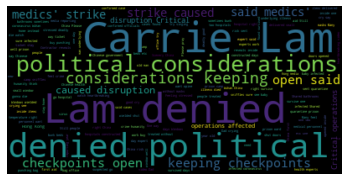

In [18]:
# creating word cloud for negative
text = " ".join(i for i in df_neg.Tweets)
wordcloud = WordCloud(max_font_size=50, background_color="black").generate(text)
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

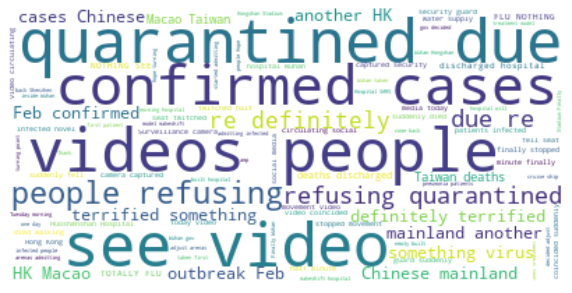

In [58]:
# creating word cloud for positive tweets
text = " ".join(i for i in df_pos.Tweets)
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

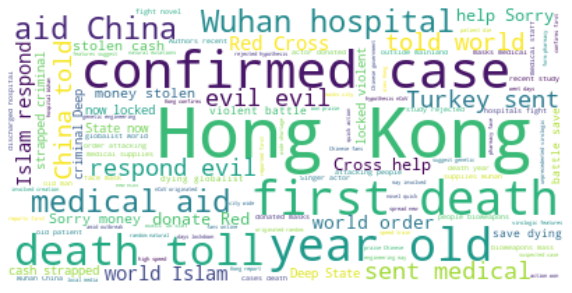

In [25]:
# creating word cloud for natural tweets
text = " ".join(i for i in df_nat.Tweets)
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()